In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
names = open('names.txt', 'r').read().splitlines()

In [11]:
chars = [chr(c) for c in range(ord('a'), ord('z') + 1)]
chars.insert(0, '.')
s2i = {s:i for i,s in enumerate(chars)}
i2s = {i:s for s,i in s2i.items()}

#Dataset

In [142]:
def build_dataset(words):
  block_size = 3
  X, Y = [], []

  for w in words:
    context = [0] * block_size
    for c in w + '.':
      ix = s2i[c]
      X.append(context)
      Y.append(ix)
      context = context[1:] + [ix]

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y

In [191]:
import random
random.seed(42)
random.shuffle(names)
n1 = int(0.8 * len(names))
n2 = int(0.9 * len(names))

Xtr, Ytr = build_dataset(names[:n1])
Xdev, Ydev = build_dataset(names[n1:n2])
Xte, Yte = build_dataset(names[n2:])

torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [273]:
hidden_layers_size = 300
embedding_size = 10

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((27, embedding_size), generator=g)
W1 = torch.randn((3 * embedding_size, hidden_layers_size), generator=g)
b1 = torch.randn(hidden_layers_size, generator=g)
W2 = torch.randn((hidden_layers_size, 27), generator=g)
b2 = torch.randn(27, generator=g)
params = [C, W1, b1, W2, b2]
for p in params:
  p.requires_grad = True

#Minibatch

In [274]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre

In [275]:
lri = []
lossi = []
stepi = []

In [295]:
for i in range(50000):
  ix = torch.randint(0, Xtr.shape[0], (64,))

  embedding = C[Xtr[ix]]
  h = torch.tanh(embedding.view(-1, 3 * embedding_size) @ W1 + b1)
  logits = h @ W2 + b2
  loss = F.cross_entropy(logits, Ytr[ix])
  #print(loss.item())

  for p in params:
    p.grad = None
  loss.backward()

  lr = 0.01 # lrs[i]
  for p in params:
    p.data += -lr * p.grad

  # finding a good learning rate
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

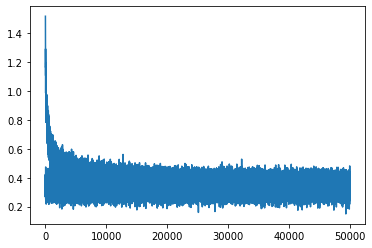

In [296]:
plt.plot(stepi, lossi)

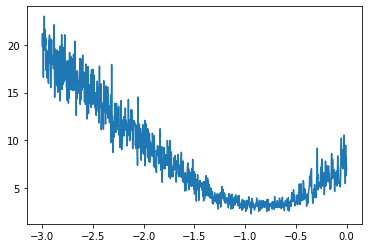

In [118]:
plt.plot(lri, lossi)

In [297]:
embedding = C[Xtr]
h = torch.tanh(embedding.view(-1, 3 * embedding_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
print(loss.item())

2.0538628101348877


In [298]:
embedding = C[Xdev]
h = torch.tanh(embedding.view(-1, 3 * embedding_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
print(loss.item())

2.1497628688812256


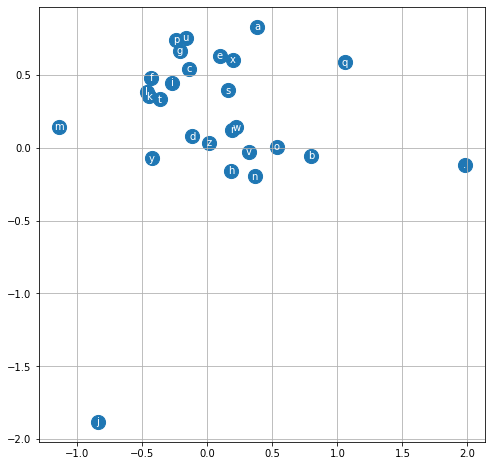

In [299]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), i2s[i], ha="center", va="center", color='white')
plt.grid('minor')

In [300]:
embedding = C[Xte]
h = torch.tanh(embedding.view(-1, 3 * embedding_size) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yte)
print(loss.item())

2.134807825088501


#Sampling from Model

In [301]:
sampling_g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
  out = []
  context = [0] * block_size
  while True:
    emb = C[torch.tensor([context])]
    h = torch.tanh(emb.view(1, -1) @ W1 + b1)
    logits = h @ W2 + b2
    probs = F.softmax(logits, dim=1)
    ix = torch.multinomial(probs, num_samples=1, generator=sampling_g).item()
    context = context[1:] + [ix]
    out.append(ix)
    if ix == 0:
      break
  
  print(''.join(i2s[i] for i in out))

carmah.
ambrilvi.
kimri.
reety.
halayslee.
zheen.
deliah.
jareen.
nellara.
chaiir.
kaleigh.
ham.
jocedeniyah.
rocken.
jadiq.
wazell.
dearynix.
kael.
dus.
brex.
